In [16]:
import numpy as np
from matplotlib import pyplot as plt

# Taller 3 Métodos númericos - Natalia Giraldo, Valerie Olave

## Introducción

La regresión lineal es un método estadístico que se usa para mostrar la relación existente entre una variable dependiente y una o más variables independientes. Esto busca encontrar la mejor línea que se ajuste a los datos observados. Por otro lado, los mínimos cuadrados son una técnica usada para encontrar la mejor aproximación a un conjunto de datos mediante la minimización de la suma de los cuadrados de las diferencias entre los valores observados y los predichos.

En este trabajo se desarrollará una serie de ejercicios que buscan profundizar los conceptos en regresión lineal y mínimos cuadrados, donde se trabajará con un conjunto de datos sobre las ventas realizadas durante un año, además de comparar las predicciones dadas con otros enfoques como la interpolación de Lagrange.

## Punto 1

Se nos presenta una tabla con los siguientes datos que corresponden a las ventas de una empresa en cada uno de los meses indicados:

In [ ]:
mes = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
ventas = np.array([15,18.2,17,19.5,21,23,22.5,24,25,27.5,28,30])

### A.  Realice el gráfico de dispersión y la respectiva gráfica de la regresión lineal

Para visualizar el gráfico de dispersión y la gráfica de regresión lineal de la relación entre los meses y las ventas realizadas en estos, primero se necesita determinar la regresión lineal que más se ajusta a los datos proporcionados. Para esto se define la función de min_cuad la cual calcula los coeficientes de una regresión lineal simple.

In [ ]:
def min_cuad(x, y):
    sumXY = 0
    sumXX = 0
    sumX = 0
    sumY = 0
    n = len(x)
    for i in range(len(x)):
        sumXY += x[i] * y[i]
        sumXX += x[i] ** 2
        sumX += x[i]
        sumY += y[i]

    A = np.array([[n, sumX], [sumX, sumXX]])
    B = np.array([sumY, sumXY])
    Ainv = np.linalg.inv(A)
    S = np.dot(Ainv,B)
    #print('A-1: ', Ainv)
    #print()
    #print('S: ', S)
    a1 = (n * sumXY - sumX * sumY) / (n * sumXX - sumX ** 2)
    a0 = (sumY - a1 * sumX) / n
    return a0, a1

In [ ]:
a0, a1 = min_cuad(mes, ventas)
print(a0, a1)
media_y = np.mean(ventas)
y_est = a0 + a1 * mes

num = np.sum((y_est-media_y) ** 2)
den = np.sum((ventas-media_y) ** 2)
r = np.sqrt(num/den)
print('coeficiente correlación min_cuad =', r)

14.315151515151499 1.2681818181818207
coeficiente correlación min_cuad = 0.9862355368048499


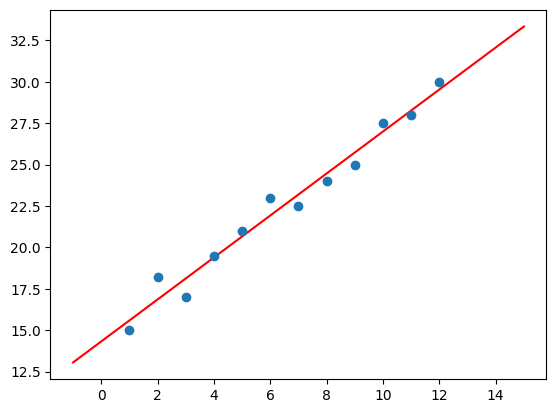

In [ ]:
resol = 20
xx = np.linspace(-1, 15, resol)
yy = a0 + a1 * xx

fig,ax = plt.subplots()
ax.plot(xx, yy, 'r')
ax.plot(mes, ventas, 'o')
plt.show()

En la gráfica obtenida se visualizan los datos dados y la línea de tendencia, donde según lo observado mediante el gráfico y el cálculo de coeficiente de correlación, se puede afirmar que la regresión lineal se ajusta de gran manera a los datos como se observa según su dispersión y la línea de tendencia.

### B. Calcule las variaciones total, explicada e inexplicada

La variación total representa la suma total de los cuadrados de las diferencias entre cada valor observado y la media global, esta mide la dispersión  total de los datos alrededor de su media. La variación explicada calcula la diferencia entre los valores estimados y la media, esta indica que tan bien el modelo explica la variabilidad de los datos, y  la variación indexplicada calcula la diferencia entre los valores reales y los estimados, esta obtiene la variabilidad que no se puede explicar. A continuación se realiza el cálculo de las tres variaciones para nuestros valores de ventas.

In [ ]:
media_y = np.mean(ventas)
ve = sum((y_est - media_y) ** 2)
print('ve =', ve)

vi = sum((ventas - y_est) ** 2)
print('vi =', vi)

vt = ve + vi
print('vt =', vt)

rsquare = ve/vt
print('r2 =', rsquare)

ve = 229.98477272727362
vi = 6.464393939393937
vt = 236.44916666666757
r2 = 0.9726605340567469


De la formula de la variación total se pueden despejar las variaciones explicadas e inexplicadas. Con estas variaciones podemos obtener el coeficiente de determinación, cuyo calculo es la variación explicada/variación total. Al realizar este cálculo nos da un coeficiente de determinación de 0.97, lo que indica que el modelo tiene un buen ajuste.

### C. Calcule el coeficiente de correlación

In [ ]:
num = np.sum((y_est-media_y) ** 2)
den = np.sum((ventas-media_y) ** 2)
r = np.sqrt(num/den)
print('r =', r)

r = 0.9862355368048499


El coeficiente de correlación demuestra que tan relacionados están los datos que se encuentran dentro de un conjunto de datos. En este caso, con una correlación de 0.9863 demuestra que existe una muy buena relación entre los meses y las ventas dadas en la tabla.

### D.  Realice la predicción de las ventas cuando se tiene el mes 13

Para predecir las ventas que se obtendrán en el mes 13 se calcula con la formula y = a0+a1*x_pred, donde x_pred es el valor que queremos predecir; en este caso, el valor de ventas para el mes trece.

In [ ]:
x_pred = 13
y_pred = a0 + a1 * x_pred
print(a0, a1)
print('y_pred =', y_pred)

14.315151515151499 1.2681818181818207
y_pred = 30.80151515151517


Como se observa, la predicción calculada con la fórmula mencionada indica que para el mes 13, el valor de las ventas será de 30.8

r = 0.9891372017430464


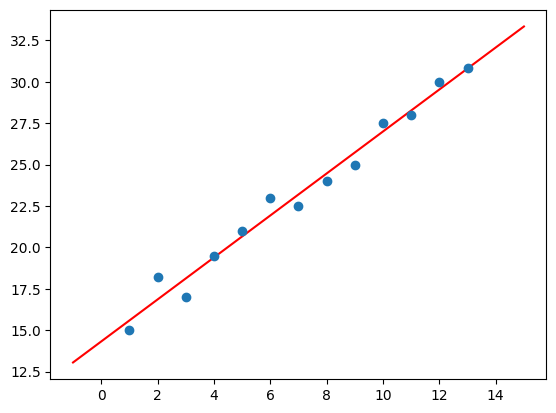

In [ ]:
x_dato = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
y_dato = np.array([15,18.2,17,19.5,21,23,22.5,24,25,27.5,28,30,y_pred])


a0, a1 = min_cuad(x_dato, y_dato)

y_est = a0 + a1 * x_dato

media_y = np.mean(y_dato)

num = np.sum((y_est-media_y) ** 2)
den = np.sum((y_dato-media_y) ** 2)
r = np.sqrt(num/den)
print('r =', r)

resol = 20
xx = np.linspace(-1, 15, resol)
yy = a0 + a1 * xx

fig,ax = plt.subplots()
ax.plot(xx, yy, 'r')
ax.plot(x_dato, y_dato, 'o')
plt.show()

Además, se aprecia como el coeficiente de correlación aumenta siguiendo el comportamiento de los datos ya relacionados y la línea de tendencia se aproxima mejor al valor predicho.

### E. usando el método de sumas de Riemann, calcular los ingresos anuales acumulados por concepto de ventas.

In [ ]:
def f(x):
    return a0 + a1 * x

n_rec = 12
a=0
b=12
delta_x = (b-a)/n_rec
x = np.linspace(a,b,n_rec+1)
#print(x,delta_x)

sum_izq = 0
sum_der = 0
sum_med = 0
for i in range(len(x)-1):
    sum_izq += f(x[i]) * delta_x
    sum_der += f(x[i+1]) * delta_x
    sum_med += f((x[i+1]+x[i])/2) * delta_x

print('{:<30} {:<30} {:<30}'. format('Ext izq', 'medio', 'ext der'))
print('{:<30} {:<30} {:<30}'. format(sum_izq,sum_med,sum_der))

Ext izq                        medio                          ext der                       
255.4818181818181              263.09090909090907             270.7                         


Se calcula de manera precisa la aproximacion a los ingresos anuales acumulados por el extremo derecho, puesto a que se esta tratando con un intervalo temporal, donde, en el extremo derecho se encontrarian las gananacias al finalizar el último mes, que equivaldría a las ganancias de todo el año.

### F: Usando el método de integración Simpson 1/3, calcular los ingresos anuales acumulados (suavizados). Esto se logra integrando las ventas como función del tiempo.

Para calcular los ingresos anuales acumulados (suvavizados) utilizando el método de simpson 1/3, se toma como función a integrar la función de estimación de ventas dada por el método de mínimos cuadrados trabajada con anterioridad.

In [ ]:
def f(x):
    return a0 + a1 * x

a = 1
b = 13
n = 13
x = np.linspace(a, b, n+1)
suma_par = 0
suma_impar = 0

for i in range(1,len(x)-1):
    if i % 2 == 0:
        suma_par +=f(x[i])
    else:
        suma_impar +=f(x[i])

integral = (b-a) * (f(x[0]) + 4*suma_impar + 2*suma_par + f(x[n]))/(3*n)
print('Integral =', integral)

Integral = 269.01179845795235



Se observa que el resultado obtenido utilizando el metodo de integracion de simpson 1/3 (269) es similar a los ingresos anuales acumulados reales con un valor de  270.71, por lo que se puede concluir que el método realiza una aproximación aceptable a los ingresos anuales acumulados.

### G:  Teniendo presente los dos items anteriores ¿coinciden los ingresos por concepto de ventas usando ambos métodos?

Calculando los ingresos anuales mediante ambos métodos (Suma de Riemman y regla de Simpson 1/3) se puede afirmar que si coinciden, sin embargo, la suma de Riemman fue más precisa en este caso, pues resulto en el valor exacto de los ingresos anuales de 270.71, mientras que usando Simpson 1/3 resulta en una aproximación de 269.011. Por lo que se puede afirmar que ambos métodos son válidos a pesar de tener distinta precisión.

## Punto 2

### A.  La función de interpolación que mejor se ajuste a los datos usando el método de Lagrange

Para obtener la relación que existen entre las ventas y los meses se hace uso de la función y = a0+a1*x que fue obtenida mediante el método de mínimos cuadrados trabajado con anterioridad; se hace uso de esta función debido a que los coeficientes a0 y a1 dados por mínimos cuadrados mínimizan el error de la suma entre los valores reales y los valores predichos, lo que proporciona un mejor ajuste.

### B. Realice la predicción de ingresos debido a las ventas en el mes 13, suponiendo que podemos extrapolar usando la función de Lagrange

In [ ]:
def f(x):
    return  a0 + a1 * x

def Lag(a,b,n,f,x):
    xi = np.linspace(a,b,n+1)
    sum = 0
    for i in range(n+1):
        prod = 1
        for j in range(n+1):
            if j != i:
                prod *= (x-xi[j])/(xi[i] - xi[j])
        sum += prod*f(xi[i])
    return sum

x = 13
InterpLag = Lag(1,13,13,f,x)
error = abs(InterpLag - f(x))/(f(x))
print('\n')

print('{:<20} {:<20} {:<20}'.format('f(x)', 'Lagrange', '%Error'))
print('{:<20} {:<20} {:<20}'.format(f(x), InterpLag, error*100))



f(x)                 Lagrange             %Error              
30.80151515151517    30.80151515151517    0.0                 


Se realiza la predicción de ventas del mes 13 usando la función de Lagrange, de modo que la función de interpolación a usar es la de las ventas estimadas, como fue explicado en el inciso anterior; Lo que hace la función de lagrange es que construye un polinomio que pasa por los puntos conocidos, y a partir de este punto, se extrapola para estimar el valor en el mes 13.

### C.  ¿La predicción del ingreso por ventas usando la interpolación de Lagrange difiere en gran medida con aquella predicción usando el método de mínimos cuadrados?

El trabajo realizado nos demuestra que no hay diferencia entre las dos predicciones realizadas mediante interpolación de Lagrange y el método de mínimos cuadrados, pues con ambos métodos la predicción de ventas para el mes 13 es de 30.8. Esto se da debido a que los datos siguen un comportamiento lineal, probado anteriormente por el coeficiente de determinación de 0.97. Por un lado, Lagrange realiza el cálculo construyendo un polinomio pasando por los puntos dados, mientras que el método de mínimos cuadrados ajusta a la recta minimizando el error entre los puntos; a pesar de realizar los cálculos de distintas maneras, el resultado fue el mismo.

## Conclusión

En el trabajo se aplicaron métodos como la regresión lineal para analizar las ventas mensuales y predecir su comportamiento en el futuro. También se estimaron los ingresos anuales utilizando técnicas de integración como las sumas de Riemann y Simpson 1/3, comparando sus resultados. Además, se uso la interpolación de Lagrange como alternativa para realizar predicciones, lo que permitió contrastar distintos enfoques. En general, el uso combinado de estos métodos facilito una comprensión más completa del comportamiento de las ventas.